In [130]:
import pandas as pd
import xlrd
import csv
import glob
paths = glob.glob("C:\\Users\\vince\\Desktop\\DataScience Project repo\\data\\transcripts\\gcsst\\excel bigrams\\*.xlsx")

In [131]:
topics = []
for path in paths:
    try:
        xl = pd.ExcelFile(path)
        dfl = xl.parse('Sheet1')
        topics.append(dfl)
    except Exception as e:
        print(e)

In [132]:
allTopics = []
for df in topics:
    mylist = df.values.tolist()
    for item in mylist:
        allTopics.append(item[0])
        allTopics.append(item[1])      

topicDictionary = {}
        
for topic in allTopics:
    topic = topic.strip()
    topicDictionary[topic] = 0

for topic in allTopics:
    topic = topic.strip()
    if topic in topicDictionary:
        topicDictionary[topic] = topicDictionary[topic] + 1

In [133]:
print(topicDictionary)

{'Shannon': 2, 'Johnson': 2, 'ball': 4, 'moving': 1, 'equal': 1, 'hands': 3, 'going': 4, 'get': 4, 'God': 4, 'keynote': 1, 'speaker': 1, 'literally': 1, 'person': 3, 'little': 44, 'bit': 41, 'social': 7, 'media': 9, 'Terror': 1, 'management': 3, 'control': 4, 'condition': 1, 'fear': 1, 'death': 4, 'hidden': 1, 'brain': 2, 'hot': 4, 'sauce': 1, 'Theory': 1, 'mental': 4, 'defenses': 1, 'paper': 1, 'rejected': 1, 'reminded': 1, 'mortality': 1, 'Matt': 2, 'Ryan': 1, 'Monday': 2, 'night': 7, 'New': 38, 'York': 31, 'Wise': 1, 'Guys': 1, 'better': 3, 'team': 3, 'coaching': 1, 'staff': 1, 'take': 4, 'last': 7, 'year': 8, 'Cory': 2, 'Booker': 2, 'Elizabeth': 3, 'Warren': 3, 'Joe': 9, 'Biden': 3, 'Kamala': 3, 'Harris': 4, 'United': 11, 'States': 10, 'daily': 5, 'wire': 1, 'general': 1, 'election': 1, 'Jurassic': 1, 'Park': 1, 'Nitro': 2, 'cold': 2, 'Starbucks': 1, 'brew': 1, 'dinosaur': 2, 'species': 1, 'new': 2, 'number': 3, 'old': 8, 'pots': 1, 'started': 1, 'investing': 2, 'Barack': 2, 'Obama

In [134]:
topicDictionaryList = []

for key in topicDictionary:
    mylist = [key, topicDictionary[key]]
    topicDictionaryList.append(mylist)
dfTopic = pd.DataFrame(topicDictionaryList)

In [135]:
dfTopic.head()

,0,1
0,Shannon,2
1,Johnson,2
2,ball,4
3,moving,1
4,equal,1


In [136]:
dfTopic.columns = ["Topics","Occurrence"]

In [137]:
print(len(dfTopic))

1649


In [138]:
import math
topTenPercentTopics = math.ceil(len(dfTopic)*0.1)
print(topTenPercentTopics)

165


In [139]:
dfTopic = dfTopic.sort_values(by=["Occurrence"], ascending=False)

In [140]:
dfTopic

,Topics,Occurrence
13,little,44
14,bit,41
38,New,38
39,York,31
212,code,18
...,...,...
809,milk,1
808,knuckles,1
807,Uganda,1
806,account,1


In [141]:
topicColumn = []
for i in range(len(dfTopic)):
    if i < topTenPercentTopics-1:
        topicColumn.append(1)
    else:
        topicColumn.append(0)

In [142]:
dfTopic["Trendy"] = topicColumn
dfTopic

,Topics,Occurrence,Trendy
13,little,44,1
14,bit,41,1
38,New,38,1
39,York,31,1
212,code,18,1
...,...,...,...
809,milk,1,0
808,knuckles,1,0
807,Uganda,1,0
806,account,1,0


In [143]:
dfTopic = dfTopic.sample(frac=1)

In [147]:
asciiNumbers = []
for index, row in dfTopic.iterrows():
    number = int(''.join(str(ord(c)) for c in row["Topics"]))
    asciiNumbers.append(number)
dfTopic["Ascii"] = asciiNumbers

In [148]:
dfTopic

,Topics,Occurrence,Trendy,Ascii
398,cup,1,0,99117112
262,Scott,1,0,8399111116116
510,sexually,1,0,11510112011797108108121
828,Prevention,1,0,80114101118101110116105111110
1514,fried,1,0,102114105101100
...,...,...,...,...
544,also,1,0,97108115111
884,Melissa,2,0,7710110810511511597
682,natural,1,0,1109711611711497108
277,Evans,1,0,6911897110115


In [145]:
import numpy as np

(1319, 2)
(1319,)
Test Score:  -0.010845513569204934


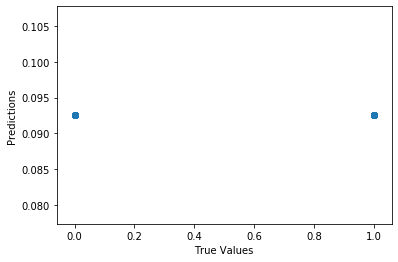

In [146]:
labels = np.array(dfTopic['Trendy'])
features = np.array(dfTopic.drop(columns=["Topics","Trendy"]))
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Test Score: ", lm.score(x_test,y_test))